In [1]:
from matplotlib import pyplot as pylt
import pandas as pd
import numpy as np
from collections import defaultdict
from scipy import stats

In [2]:
df = pd.read_csv('~/Documents/manual_segmentation_results/2d.csv')

Fill NaN values with overall dataset mean. Might be better to remove/zero out?

In [3]:
print(f'Filling {df[df.isna().any(axis=1)].shape[0]} instances containing NaN values.')

Filling 494 instances containing NaN values.


In [4]:
d = defaultdict()
for column in df.columns:
    d[column] = df[column].mean()

In [5]:
df.fillna(value=d, inplace=True)

Filter out extreme outliers (deviating more than 5 standard deviations from the mean).

In [6]:
numrows = df.shape[0]
df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]
print(f'Filtered out {numrows - df.shape[0]} instances.')

Filtered out 28 instances.


In [7]:
df

,dir,ecLF,ecLF.aSD,ecLF.aMav,ecLF.aMiv,ccMF,ccMF.aSD,ccMF.aMav,ccMF.aMiv,icLF,...,pLT.aMav,pLT.aMiv,iMT,iMT.aSD,iMT.aMav,iMT.aMiv,aMT,aMT.aSD,aMT.aMav,aMT.aMiv
0,9162498,6.929194,1.592449,9.166409,5.541486,7.838962,0.630623,8.690957,6.932284,6.314505,...,3.165673,1.430708,3.402937,0.335611,4.358292,2.996875,2.155793,0.471417,2.933400,1.070176
1,9211751,6.929194,1.592449,9.166409,5.541486,7.796540,0.392812,8.532628,7.244081,9.187202,...,3.724498,1.548217,2.885473,0.336482,3.231243,2.115541,2.870127,0.894376,4.027808,1.012588
2,9230284,6.929194,1.592449,9.166409,5.541486,10.457737,0.657316,11.203017,9.056911,5.747623,...,3.165673,1.430708,4.379000,0.971811,6.116121,3.168525,4.368333,1.976815,7.186868,1.504817
3,9156526,6.929194,1.592449,9.166409,5.541486,8.027554,1.121890,9.123019,6.527228,6.600671,...,3.165673,1.430708,3.311320,0.475121,4.057420,2.558525,2.982393,0.762992,5.121133,1.490583
4,9246518,10.357838,1.770485,11.910722,8.804955,7.975381,0.625843,8.884354,7.131163,6.904559,...,3.873064,2.314245,4.257470,0.351231,5.076223,3.672119,3.411677,1.000782,5.194980,1.295589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,9141244,6.929194,1.592449,9.166409,5.541486,8.604472,0.323894,9.205387,8.234625,5.494814,...,3.165673,1.430708,3.114414,0.721433,3.799040,0.827240,3.162637,1.591909,8.034492,1.279217
503,9001104,6.929194,1.592449,9.166409,5.541486,6.969738,0.487016,7.700888,6.283162,6.691041,...,3.165673,1.430708,2.394930,0.446338,2.876460,1.124673,2.443756,0.652885,3.902231,0.865676
504,9034644,6.929194,1.592449,9.166409,5.541486,7.636068,0.624500,8.294428,6.375838,5.396415,...,3.165673,1.430708,4.100749,1.412245,6.734716,2.429418,3.584473,1.697422,7.828543,1.516780
505,9109448,5.611706,1.035002,6.647312,4.591424,8.841460,0.827008,10.465506,7.674456,9.904110,...,2.202236,0.717362,4.578477,0.610285,5.344271,3.634117,3.340036,1.411739,5.571554,0.732599


In [8]:
df.columns

Index(['dir', 'ecLF', 'ecLF.aSD', 'ecLF.aMav', 'ecLF.aMiv', 'ccMF', 'ccMF.aSD',
       'ccMF.aMav', 'ccMF.aMiv', 'icLF', 'icLF.aSD', 'icLF.aMav', 'icLF.aMiv',
       'ccLF', 'ccLF.aSD', 'ccLF.aMav', 'ccLF.aMiv', 'icMF', 'icMF.aSD',
       'icMF.aMav', 'icMF.aMiv', 'ecMF', 'ecMF.aSD', 'ecMF.aMav', 'ecMF.aMiv',
       'eMT', 'eMT.aSD', 'eMT.aMav', 'eMT.aMiv', 'aLT', 'aLT.aSD', 'aLT.aMav',
       'aLT.aMiv', 'cLT', 'cLT.aSD', 'cLT.aMav', 'cLT.aMiv', 'eLT', 'eLT.aSD',
       'eLT.aMav', 'eLT.aMiv', 'iLT', 'iLT.aSD', 'iLT.aMav', 'iLT.aMiv', 'cMT',
       'cMT.aSD', 'cMT.aMav', 'cMT.aMiv', 'pMT', 'pMT.aSD', 'pMT.aMav',
       'pMT.aMiv', 'pLT', 'pLT.aSD', 'pLT.aMav', 'pLT.aMiv', 'iMT', 'iMT.aSD',
       'iMT.aMav', 'iMT.aMiv', 'aMT', 'aMT.aSD', 'aMT.aMav', 'aMT.aMiv'],
      dtype='object')

In [9]:
eclf = df['ecLF']
cclf = df['ccLF']
iclf = df['icLF']
icmf = df['icMF']
ccmf = df['ccMF']
ecmf = df['ecMF']

elt = df['eLT']
plt = df['pLT']
ilt = df['iLT']
alt = df['aLT']
clt = df['cLT']

emt = df['eMT']
pmt = df['pMT']
imt = df['iMT']
amt = df['aMT']
cmt = df['cMT']

In [10]:
xs = np.arange(0, df.shape[0])
len(xs)

479

# Mesh

## Subregion scatters

### Femur

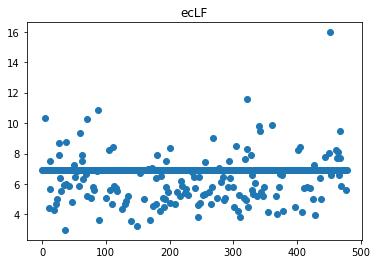

In [11]:
ys = eclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ecLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

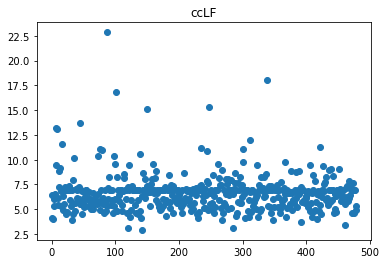

In [12]:
ys = cclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ccLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

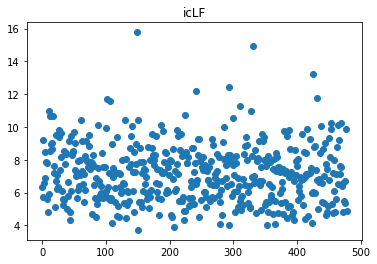

In [13]:
ys = iclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('icLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

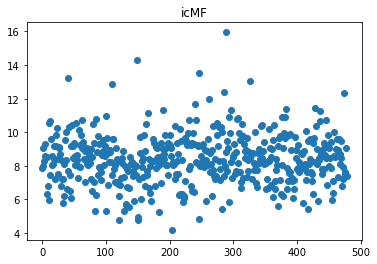

In [14]:
ys = icmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('icMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

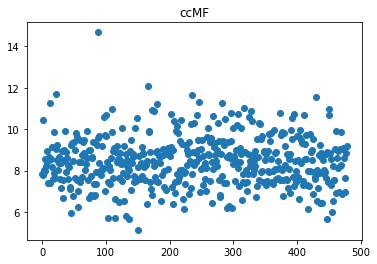

In [15]:
ys = ccmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ccMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

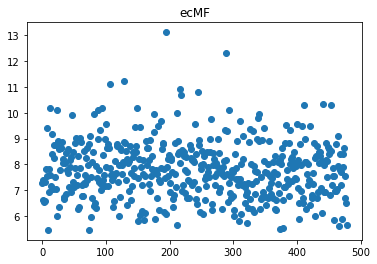

In [16]:
ys = ecmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ecMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

### Tibia

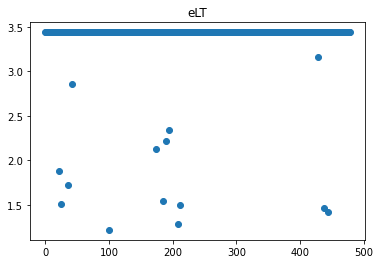

In [17]:
ys = elt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('eLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

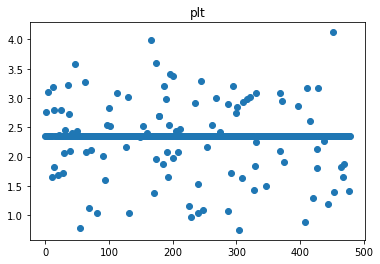

In [18]:
ys = plt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('plt')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

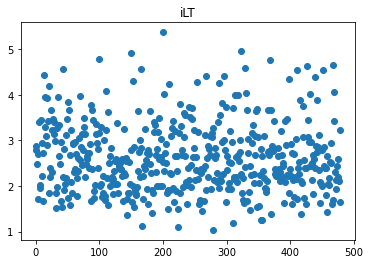

In [19]:
ys = ilt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('iLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

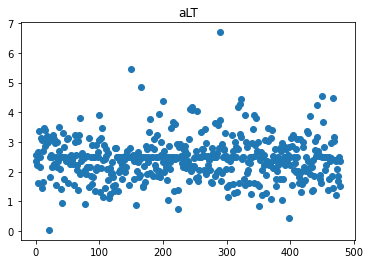

In [20]:
ys = alt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

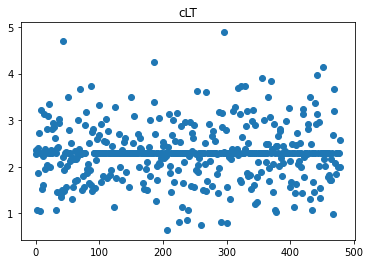

In [21]:
ys = clt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('cLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

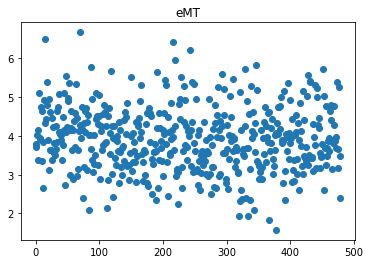

In [22]:
ys = emt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('eMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

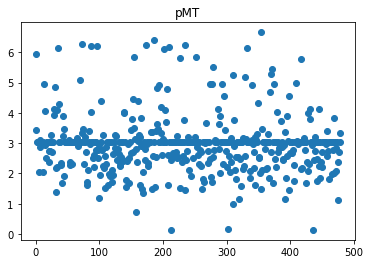

In [23]:
ys = pmt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('pMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

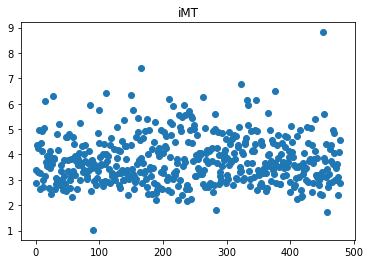

In [24]:
ys = imt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('iMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

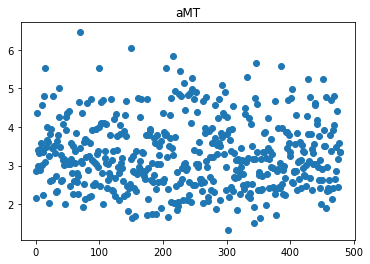

In [25]:
ys = amt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

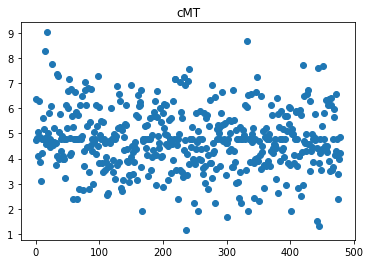

In [26]:
ys = cmt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('cMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

## Subregion boxplots

### Femur

Segmentation 9246518.0 is an outlier (3.43 total deviation from median)
Segmentation 9201046.0 is an outlier (2.49 total deviation from median)
Segmentation 9244698.0 is an outlier (0.56 total deviation from median)
Segmentation 9189303.0 is an outlier (1.28 total deviation from median)
Segmentation 9194012.0 is an outlier (2.64 total deviation from median)
Segmentation 9250129.0 is an outlier (2.24 total deviation from median)
Segmentation 9240925.0 is an outlier (1.92 total deviation from median)
Segmentation 9218935.0 is an outlier (1.75 total deviation from median)
Segmentation 9223980.0 is an outlier (1.00 total deviation from median)
Segmentation 9194860.0 is an outlier (0.54 total deviation from median)
Segmentation 9248932.0 is an outlier (1.37 total deviation from median)
Segmentation 9148828.0 is an outlier (0.98 total deviation from median)
Segmentation 9211869.0 is an outlier (3.95 total deviation from median)
Segmentation 9144760.0 is an outlier (1.85 total deviation from 

Text(0.5, 1.0, 'ecLF')

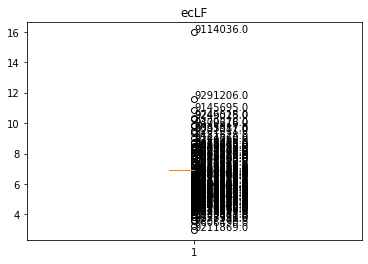

In [27]:
ys = eclf.to_numpy()
pylt.boxplot(ys)
q1 = eclf.quantile(.25)
q3 = eclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - eclf.median()):.2f} total deviation from median)')
        
pylt.title('ecLF')

Segmentation 9197994.0 is an outlier (2.80 total deviation from median)
Segmentation 9179789.0 is an outlier (6.58 total deviation from median)
Segmentation 9186589.0 is an outlier (6.49 total deviation from median)
Segmentation 9189303.0 is an outlier (2.58 total deviation from median)
Segmentation 9152569.0 is an outlier (4.97 total deviation from median)
Segmentation 9148828.0 is an outlier (3.59 total deviation from median)
Segmentation 9222973.0 is an outlier (7.08 total deviation from median)
Segmentation 9256759.0 is an outlier (3.77 total deviation from median)
Segmentation 9227993.0 is an outlier (4.48 total deviation from median)
Segmentation 9209896.0 is an outlier (4.37 total deviation from median)
Segmentation 9145695.0 is an outlier (16.25 total deviation from median)
Segmentation 9269275.0 is an outlier (3.79 total deviation from median)
Segmentation 9707649.0 is an outlier (2.99 total deviation from median)
Segmentation 9988421.0 is an outlier (10.24 total deviation fro

Text(0.5, 1.0, 'ccLF')

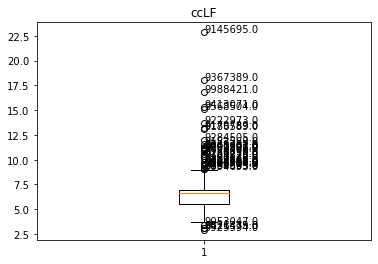

In [28]:
ys = cclf.to_numpy()
pylt.boxplot(ys)
q1 = cclf.quantile(.25)
q3 = cclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - cclf.median()):.2f} total deviation from median)')
        
pylt.title('ccLF')

Segmentation 9606490.0 is an outlier (8.66 total deviation from median)
Segmentation 9534875.0 is an outlier (5.10 total deviation from median)
Segmentation 9302260.0 is an outlier (5.30 total deviation from median)
Segmentation 9316108.0 is an outlier (7.83 total deviation from median)
Segmentation 9108714.0 is an outlier (6.14 total deviation from median)


Text(0.5, 1.0, 'icLF')

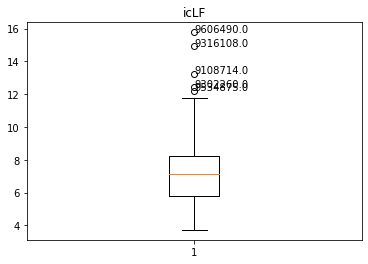

In [29]:
ys = iclf.to_numpy()
pylt.boxplot(ys)
q1 = iclf.quantile(.25)
q3 = iclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - iclf.median()):.2f} total deviation from median)')
        
pylt.title('icLF')

Segmentation 9258563.0 is an outlier (4.85 total deviation from median)
Segmentation 9817241.0 is an outlier (4.49 total deviation from median)
Segmentation 9943227.0 is an outlier (3.58 total deviation from median)
Segmentation 9606490.0 is an outlier (5.93 total deviation from median)
Segmentation 9700341.0 is an outlier (3.58 total deviation from median)
Segmentation 9421492.0 is an outlier (4.17 total deviation from median)
Segmentation 9410941.0 is an outlier (5.20 total deviation from median)
Segmentation 9413071.0 is an outlier (3.51 total deviation from median)
Segmentation 9473858.0 is an outlier (3.63 total deviation from median)
Segmentation 9493245.0 is an outlier (4.02 total deviation from median)
Segmentation 9539141.0 is an outlier (7.60 total deviation from median)
Segmentation 9341699.0 is an outlier (4.71 total deviation from median)
Segmentation 9141244.0 is an outlier (3.98 total deviation from median)


Text(0.5, 1.0, 'icMF')

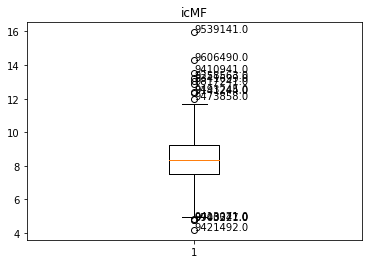

In [30]:
ys = icmf.to_numpy()
pylt.boxplot(ys)
q1 = icmf.quantile(.25)
q3 = icmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - icmf.median()):.2f} total deviation from median)')
        
pylt.title('icMF')

Segmentation 9250129.0 is an outlier (3.25 total deviation from median)
Segmentation 9145695.0 is an outlier (6.24 total deviation from median)
Segmentation 9568504.0 is an outlier (3.29 total deviation from median)
Segmentation 9686590.0 is an outlier (3.64 total deviation from median)
Segmentation 9409935.0 is an outlier (3.20 total deviation from median)
Segmentation 9410941.0 is an outlier (2.90 total deviation from median)
Segmentation 9003430.0 is an outlier (3.14 total deviation from median)


Text(0.5, 1.0, 'ccMF')

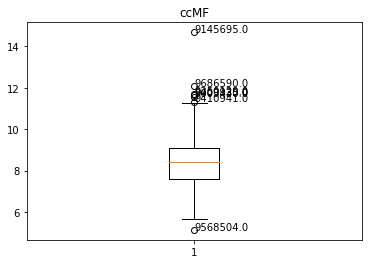

In [31]:
ys = ccmf.to_numpy()
pylt.boxplot(ys)
q1 = ccmf.quantile(.25)
q3 = ccmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ccmf.median()):.2f} total deviation from median)')
        
pylt.title('ccMF')

Segmentation 9867315.0 is an outlier (3.35 total deviation from median)
Segmentation 9995338.0 is an outlier (3.46 total deviation from median)
Segmentation 9878765.0 is an outlier (5.35 total deviation from median)
Segmentation 9518267.0 is an outlier (3.15 total deviation from median)
Segmentation 9476283.0 is an outlier (2.92 total deviation from median)
Segmentation 9471287.0 is an outlier (3.06 total deviation from median)
Segmentation 9539141.0 is an outlier (4.55 total deviation from median)


Text(0.5, 1.0, 'ecMF')

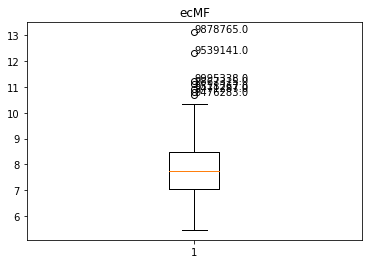

In [32]:
ys = ecmf.to_numpy()
pylt.boxplot(ys)
q1 = ecmf.quantile(.25)
q3 = ecmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ecmf.median()):.2f} total deviation from median)')
        
pylt.title('ecMF')

### Tibia

Segmentation 9250129.0 is an outlier (1.56 total deviation from median)
Segmentation 9240925.0 is an outlier (1.93 total deviation from median)
Segmentation 9148828.0 is an outlier (1.72 total deviation from median)
Segmentation 9223789.0 is an outlier (0.58 total deviation from median)
Segmentation 9707649.0 is an outlier (2.22 total deviation from median)
Segmentation 9884591.0 is an outlier (1.31 total deviation from median)
Segmentation 9833782.0 is an outlier (1.89 total deviation from median)
Segmentation 9598683.0 is an outlier (1.22 total deviation from median)
Segmentation 9566781.0 is an outlier (1.09 total deviation from median)
Segmentation 9467311.0 is an outlier (2.16 total deviation from median)
Segmentation 9456548.0 is an outlier (1.94 total deviation from median)
Segmentation 9036287.0 is an outlier (0.28 total deviation from median)
Segmentation 9052335.0 is an outlier (1.97 total deviation from median)
Segmentation 9131266.0 is an outlier (2.01 total deviation from 

Text(0.5, 1.0, 'eLT')

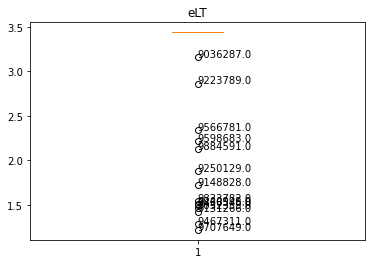

In [33]:
ys = elt.to_numpy()
pylt.boxplot(ys)
q1 = elt.quantile(.25)
q3 = elt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - elt.median()):.2f} total deviation from median)')
        
pylt.title('eLT')

Segmentation 9211751.0 is an outlier (0.42 total deviation from median)
Segmentation 9246518.0 is an outlier (0.77 total deviation from median)
Segmentation 9201046.0 is an outlier (0.69 total deviation from median)
Segmentation 9244698.0 is an outlier (0.85 total deviation from median)
Segmentation 9189303.0 is an outlier (0.46 total deviation from median)
Segmentation 9154793.0 is an outlier (0.53 total deviation from median)
Segmentation 9194012.0 is an outlier (0.66 total deviation from median)
Segmentation 9250129.0 is an outlier (0.02 total deviation from median)
Segmentation 9240925.0 is an outlier (0.45 total deviation from median)
Segmentation 9194860.0 is an outlier (0.62 total deviation from median)
Segmentation 9146898.0 is an outlier (0.29 total deviation from median)
Segmentation 9248932.0 is an outlier (0.12 total deviation from median)
Segmentation 9148828.0 is an outlier (0.89 total deviation from median)
Segmentation 9144760.0 is an outlier (0.38 total deviation from 

Text(0.5, 1.0, 'pLT')

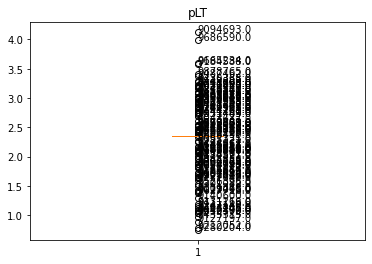

In [34]:
ys = plt.to_numpy()
pylt.boxplot(ys)
q1 = plt.quantile(.25)
q3 = plt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - plt.median()):.2f} total deviation from median)')
        
pylt.title('pLT')

Segmentation 9223789.0 is an outlier (2.06 total deviation from median)
Segmentation 9707649.0 is an outlier (2.28 total deviation from median)
Segmentation 9606490.0 is an outlier (2.40 total deviation from median)
Segmentation 9686590.0 is an outlier (2.06 total deviation from median)
Segmentation 9487462.0 is an outlier (2.87 total deviation from median)
Segmentation 9395979.0 is an outlier (2.45 total deviation from median)
Segmentation 9311328.0 is an outlier (2.09 total deviation from median)
Segmentation 9314341.0 is an outlier (2.25 total deviation from median)
Segmentation 9108714.0 is an outlier (2.12 total deviation from median)
Segmentation 9130672.0 is an outlier (2.14 total deviation from median)


Text(0.5, 1.0, 'iLT')

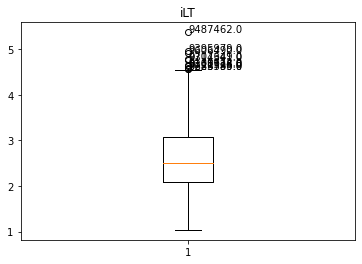

In [35]:
ys = ilt.to_numpy()
pylt.boxplot(ys)
q1 = ilt.quantile(.25)
q3 = ilt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ilt.median()):.2f} total deviation from median)')
        
pylt.title('iLT')

Segmentation 9266394.0 is an outlier (2.45 total deviation from median)
Segmentation 9708353.0 is an outlier (1.44 total deviation from median)
Segmentation 9606490.0 is an outlier (2.98 total deviation from median)
Segmentation 9781749.0 is an outlier (1.60 total deviation from median)
Segmentation 9686590.0 is an outlier (2.37 total deviation from median)
Segmentation 9566781.0 is an outlier (1.45 total deviation from median)
Segmentation 9487462.0 is an outlier (1.90 total deviation from median)
Segmentation 9421281.0 is an outlier (1.76 total deviation from median)
Segmentation 9534875.0 is an outlier (1.64 total deviation from median)
Segmentation 9471287.0 is an outlier (1.69 total deviation from median)
Segmentation 9410941.0 is an outlier (1.58 total deviation from median)
Segmentation 9494867.0 is an outlier (1.57 total deviation from median)
Segmentation 9539141.0 is an outlier (4.21 total deviation from median)
Segmentation 9397988.0 is an outlier (1.69 total deviation from 

Text(0.5, 1.0, 'aLT')

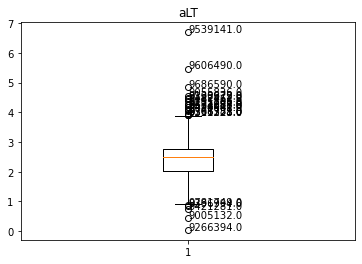

In [36]:
ys = alt.to_numpy()
pylt.boxplot(ys)
q1 = alt.quantile(.25)
q3 = alt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - alt.median()):.2f} total deviation from median)')
        
pylt.title('aLT')

Segmentation 9230284.0 is an outlier (1.23 total deviation from median)
Segmentation 9197994.0 is an outlier (1.24 total deviation from median)
Segmentation 9186589.0 is an outlier (0.92 total deviation from median)
Segmentation 9189303.0 is an outlier (0.83 total deviation from median)
Segmentation 9194012.0 is an outlier (0.79 total deviation from median)
Segmentation 9250129.0 is an outlier (1.05 total deviation from median)
Segmentation 9211049.0 is an outlier (1.23 total deviation from median)
Segmentation 9202515.0 is an outlier (0.88 total deviation from median)
Segmentation 9258563.0 is an outlier (0.95 total deviation from median)
Segmentation 9223789.0 is an outlier (2.40 total deviation from median)
Segmentation 9180558.0 is an outlier (1.21 total deviation from median)
Segmentation 9250756.0 is an outlier (0.99 total deviation from median)
Segmentation 9249025.0 is an outlier (1.37 total deviation from median)
Segmentation 9209896.0 is an outlier (0.88 total deviation from 

Text(0.5, 1.0, 'cLT')

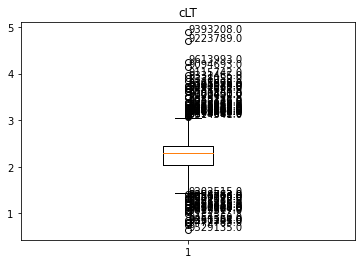

In [37]:
ys = clt.to_numpy()
pylt.boxplot(ys)
q1 = clt.quantile(.25)
q3 = clt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - clt.median()):.2f} total deviation from median)')
        
pylt.title('cLT')

Segmentation 9154793.0 is an outlier (2.58 total deviation from median)
Segmentation 9249025.0 is an outlier (2.77 total deviation from median)
Segmentation 9518267.0 is an outlier (2.51 total deviation from median)
Segmentation 9534875.0 is an outlier (2.30 total deviation from median)
Segmentation 9319367.0 is an outlier (2.33 total deviation from median)


Text(0.5, 1.0, 'eMT')

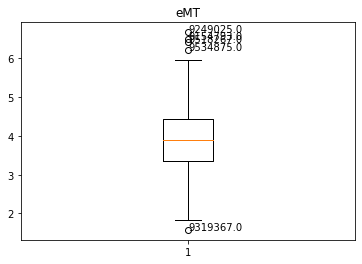

In [38]:
ys = emt.to_numpy()
pylt.boxplot(ys)
q1 = emt.quantile(.25)
q3 = emt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - emt.median()):.2f} total deviation from median)')
        
pylt.title('eMT')

Segmentation 9211751.0 is an outlier (2.93 total deviation from median)
Segmentation 9189303.0 is an outlier (1.93 total deviation from median)
Segmentation 9154793.0 is an outlier (1.03 total deviation from median)
Segmentation 9194860.0 is an outlier (1.11 total deviation from median)
Segmentation 9146898.0 is an outlier (0.90 total deviation from median)
Segmentation 9248932.0 is an outlier (1.82 total deviation from median)
Segmentation 9211049.0 is an outlier (1.64 total deviation from median)
Segmentation 9157758.0 is an outlier (1.08 total deviation from median)
Segmentation 9148828.0 is an outlier (3.11 total deviation from median)
Segmentation 9144760.0 is an outlier (1.25 total deviation from median)
Segmentation 9223789.0 is an outlier (0.88 total deviation from median)
Segmentation 9211547.0 is an outlier (2.05 total deviation from median)
Segmentation 9184790.0 is an outlier (3.25 total deviation from median)
Segmentation 9252130.0 is an outlier (1.39 total deviation from 

Text(0.5, 1.0, 'pMT')

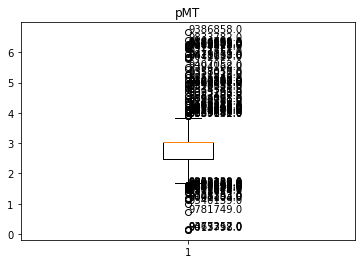

In [39]:
ys = pmt.to_numpy()
pylt.boxplot(ys)
q1 = pmt.quantile(.25)
q3 = pmt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - pmt.median()):.2f} total deviation from median)')
        
pylt.title('pMT')

Segmentation 9223980.0 is an outlier (2.67 total deviation from median)
Segmentation 9158391.0 is an outlier (2.61 total deviation from median)
Segmentation 9817241.0 is an outlier (2.78 total deviation from median)
Segmentation 9606490.0 is an outlier (2.73 total deviation from median)
Segmentation 9686590.0 is an outlier (3.79 total deviation from median)
Segmentation 9395979.0 is an outlier (3.14 total deviation from median)
Segmentation 9323079.0 is an outlier (2.86 total deviation from median)
Segmentation 9094693.0 is an outlier (5.18 total deviation from median)


Text(0.5, 1.0, 'iMT')

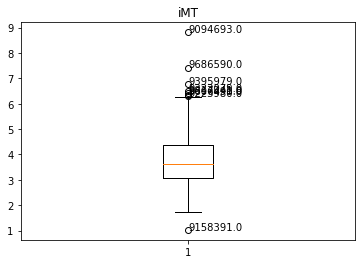

In [40]:
ys = imt.to_numpy()
pylt.boxplot(ys)
q1 = imt.quantile(.25)
q3 = imt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - imt.median()):.2f} total deviation from median)')
        
pylt.title('iMT')

Segmentation 9249025.0 is an outlier (3.30 total deviation from median)
Segmentation 9606490.0 is an outlier (2.90 total deviation from median)
Segmentation 9518267.0 is an outlier (2.69 total deviation from median)


Text(0.5, 1.0, 'aMT')

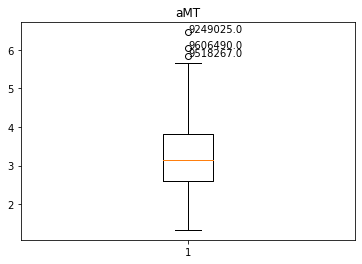

In [41]:
ys = amt.to_numpy()
pylt.boxplot(ys)
q1 = amt.quantile(.25)
q3 = amt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - amt.median()):.2f} total deviation from median)')
        
pylt.title('aMT')

Segmentation 9154793.0 is an outlier (3.51 total deviation from median)
Segmentation 9238060.0 is an outlier (4.25 total deviation from median)
Segmentation 9223685.0 is an outlier (3.00 total deviation from median)
Segmentation 9460287.0 is an outlier (3.62 total deviation from median)
Segmentation 9351245.0 is an outlier (3.10 total deviation from median)
Segmentation 9316108.0 is an outlier (3.90 total deviation from median)
Segmentation 9101951.0 is an outlier (2.93 total deviation from median)
Segmentation 9015718.0 is an outlier (3.26 total deviation from median)
Segmentation 9116298.0 is an outlier (3.45 total deviation from median)


Text(0.5, 1.0, 'cMT')

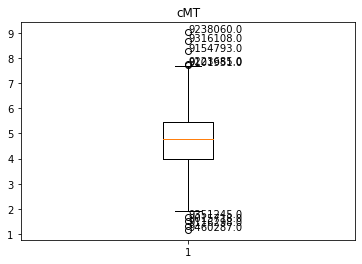

In [42]:
ys = cmt.to_numpy()
pylt.boxplot(ys)
q1 = cmt.quantile(.25)
q3 = cmt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - cmt.median()):.2f} total deviation from median)')
        
pylt.title('cMT')